# What is the probability that 6 is the last number visited by the ladybug?

In [12]:
import random


def random_move() -> int:
    """
    Randomly return -1 for counterclockwise move and 1 for clockwise move.
    """
    return random.choice([-1, 1])


def next_position(current_position, move_direction) -> int:
    """
    Moves the ladybug to the next position, accounting for moving from 12 to 1 and from
    1 to 12 since simply [in,de]crementing the current_position won't work.

    Args:
        current_position (int): value between 1 and 12
        move_direction (int): 1 equates to clockwise, -1 to counterclockwise
    Returns:
        int: value between 1 and 12, one position away from the `current_position` in the
            indicated `move_direction`
    """
    if (next_position := current_position + move_direction) >= 1 and next_position <= 12:
        return next_position
    # Moving clockwise from 12 to 1
    elif next_position == 13:
        return 1
    # Where `next_position = 0`, moving counterclockwise from 1 to 12
    else:
        return 12


def simulate_round() -> int:
    """
    The ladybug visits all positions on the clock face until each has been visited at least once.
    The round is completed after landing on the last not-yet-visited position. That position is
    the `last_position` result of the round.

    Returns:
        int: last position (number) on the clock face to be visited during the round
    """
    ALL_POSITIONS = {pos for pos in range(1, 13, 1)}

    # Initialize with 12 since that's always the ladybug's starting position for a new round
    current_position = 12
    positions_visited = {current_position}
    # position_history = [current_position]

    while len(positions_visited) <= 11:
        # Move the ladybug and update tracking if on a new number during the round
        next_pos = next_position(current_position, random_move())
        current_position = next_pos
        positions_visited.add(current_position)
        # position_history.append(current_position)

        # Return early even before we visit the last number if there's only one remaining number which hasn't been visited
        remaining_pos = ALL_POSITIONS - positions_visited
        if len(remaining_pos) == 1:
            last_position = list(remaining_pos)[0]
            # print(f"{position_history=}")
            # print(f"{positions_visited=}")
            return last_position

In [13]:
simulate_round()

7

In [26]:
from collections import Counter


def simulate_n_rounds(num_rounds: int = 1_000) -> float:
    # Keys: number on the clock face 1-11 (excluding 12 since we start there)
    # Values: number of times the given clock number was the last one visited during a round
    last_number_visited_counter = Counter[int]()

    for i in range(num_rounds):
        last_number_visited_counter[simulate_round()] += 1
    # sorted_by_key_counter = dict(sorted(last_number_visited_counter.items()))
    # print(sorted_by_key_counter)
    return round((last_number_visited_counter[6] / num_rounds), 4)


PROBABILITY_FOR_6_SAMPLES = []

for i in range(10_000):
    PROBABILITY_FOR_6_SAMPLES.append(simulate_n_rounds(num_rounds=100))

In [27]:
import matplotlib.pyplot as plt

In [28]:
max(PROBABILITY_FOR_6_SAMPLES)

0.22

(array([5.000e+00, 0.000e+00, 4.200e+01, 0.000e+00, 1.140e+02, 0.000e+00,
        0.000e+00, 2.800e+02, 0.000e+00, 5.860e+02, 0.000e+00, 8.980e+02,
        0.000e+00, 0.000e+00, 1.105e+03, 0.000e+00, 1.365e+03, 0.000e+00,
        0.000e+00, 1.383e+03, 0.000e+00, 1.239e+03, 0.000e+00, 1.005e+03,
        0.000e+00, 0.000e+00, 7.900e+02, 0.000e+00, 5.030e+02, 0.000e+00,
        3.250e+02, 0.000e+00, 0.000e+00, 1.790e+02, 0.000e+00, 8.700e+01,
        0.000e+00, 0.000e+00, 5.900e+01, 0.000e+00, 1.900e+01, 0.000e+00,
        1.000e+01, 0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.01  , 0.0142, 0.0184, 0.0226, 0.0268, 0.031 , 0.0352, 0.0394,
        0.0436, 0.0478, 0.052 , 0.0562, 0.0604, 0.0646, 0.0688, 0.073 ,
        0.0772, 0.0814, 0.0856, 0.0898, 0.094 , 0.0982, 0.1024, 0.1066,
        0.1108, 0.115 , 0.1192, 0.1234, 0.1276, 0.1318, 0.136 , 0.1402,
        0.1444, 0.1486, 0.1528, 0.157 , 0.1612, 0.1654, 0.1696, 0.1738,
        0.178 , 

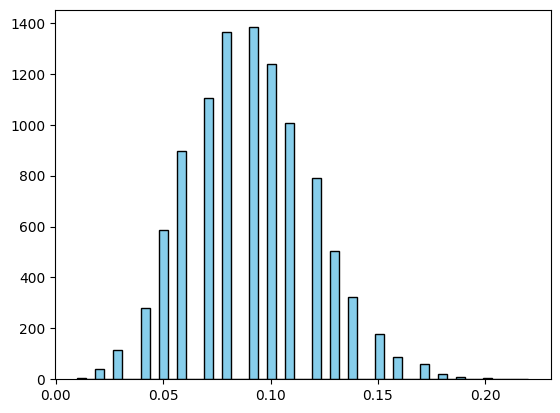

In [30]:
plt.hist(PROBABILITY_FOR_6_SAMPLES, bins=50, color="skyblue", edgecolor="black")

In [34]:
import pandas as pd


def distribution_stats_of_sampling(series: list[float]):
    pd_series = pd.Series(series)
    return pd_series.describe()

In [35]:
distribution_stats_of_sampling(PROBABILITY_FOR_6_SAMPLES)

count    10000.000000
mean         0.090720
std          0.028817
min          0.010000
25%          0.070000
50%          0.090000
75%          0.110000
max          0.220000
dtype: float64

In [ ]:
PROBABILITY_FOR_6_SAMPLES_v2 = []

for i in range(10_000):
    PROBABILITY_FOR_6_SAMPLES_v2.append(simulate_n_rounds(num_rounds=1_000))

In [37]:
distribution_stats_of_sampling(PROBABILITY_FOR_6_SAMPLES_v2)

count    1000.000000
mean        0.090495
std         0.008544
min         0.061000
25%         0.085000
50%         0.090000
75%         0.096000
max         0.119000
dtype: float64

(array([  1.,   0.,   0.,   1.,   0.,   0.,   1.,   2.,   2.,   9.,   7.,
         10.,  17.,  16.,  13.,  24.,  16.,  23.,  51.,  37.,  35.,  35.,
         43.,  55.,  61., 117.,  51.,  44.,  39.,  32.,  25.,  64.,  23.,
         26.,  18.,  15.,  20.,  19.,   9.,   7.,   9.,   5.,   7.,   3.,
          0.,   2.,   2.,   2.,   0.,   2.]),
 array([0.061  , 0.06216, 0.06332, 0.06448, 0.06564, 0.0668 , 0.06796,
        0.06912, 0.07028, 0.07144, 0.0726 , 0.07376, 0.07492, 0.07608,
        0.07724, 0.0784 , 0.07956, 0.08072, 0.08188, 0.08304, 0.0842 ,
        0.08536, 0.08652, 0.08768, 0.08884, 0.09   , 0.09116, 0.09232,
        0.09348, 0.09464, 0.0958 , 0.09696, 0.09812, 0.09928, 0.10044,
        0.1016 , 0.10276, 0.10392, 0.10508, 0.10624, 0.1074 , 0.10856,
        0.10972, 0.11088, 0.11204, 0.1132 , 0.11436, 0.11552, 0.11668,
        0.11784, 0.119  ]),
 <BarContainer object of 50 artists>)

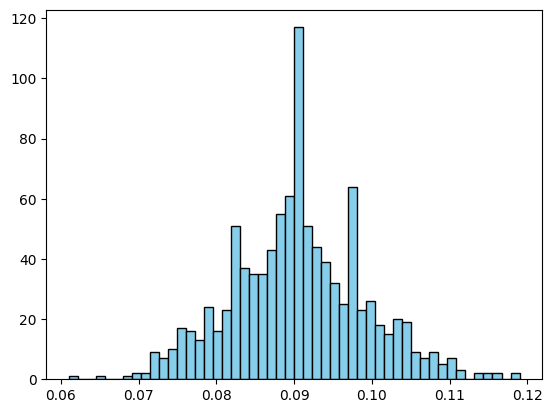

In [ ]:
plt.hist(PROBABILITY_FOR_6_SAMPLES_v2, bins=50, color="skyblue", edgecolor="black")